# **Python Imports**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Import & Cleaning**

In [22]:
df = pd.read_csv('data/salaries_data.csv')
print(f"The data contains {df.shape[0]} rows and {df.shape[1]} columns.")

The data contains 2649 rows and 18 columns.


In [23]:
df.head()

,Timestamp,Gender,Degree,BusinessMarket,ProgrammingLanguages,BusinessSize,Title,Level,Yoe,YoeBuckets,TotalCompensationEgp,WorkSetting,BusinessFocus,BusinessLine,TotalCompensationEgpBuckets,Industries,IsEgp,CompanyLocation
0,4/2/2024 11:10:37,Male,Yes,NaN,"PHP, JavaScript, TypeScript, HTML/CSS",A Small and Medium Enterprise,Backend Engineer,Mid-level,5.0,3-5,"42,437.50",Hybrid,Outsourcing Company,B2B & B2C lines,40-50K,"Fintech, Technology",Another currency (e.g USD),Cairo
1,4/2/2024 11:12:13,Male,Yes,NaN,"TypeScript, HTML/CSS",A Small and Medium Enterprise,Frontend Engineer,Mid-level,2.5,1-3,"20,000.00",Hybrid,Product-based company,B2B,20-25K,Human Resources Services,EGP,Cairo
2,4/2/2024 11:15:17,Female,Yes,Global,NaN,A Small and Medium Enterprise,UI/UX Designer/Engineer,Mid-level,2.5,1-3,"42,000.00",Remote/Egypt,Product-based company,B2B,40-50K,Technology,EGP,Cairo
3,4/2/2024 11:18:12,Male,Yes,NaN,"PHP, JavaScript",A Large Enterprise/Multinational Company,Backend Engineer,Junior,1.0,0-1,"16,000.00",Hybrid,Product-based company,B2B,15-20K,Lead Gathering,EGP,Alexandria
4,4/2/2024 11:19:20,Male,Yes,NaN,"JavaScript, TypeScript",A Start-up,Backend Engineer,Senior,2.0,1-3,"101,850.00",Hybrid,Product-based company,B2B & B2C lines,100-120K,"Automotive, Transportation",Another currency (e.g USD),No site in Egypt


In [24]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    2649 non-null   object 
 1   Gender                       2649 non-null   object 
 2   Degree                       2649 non-null   object 
 3   BusinessMarket               2088 non-null   object 
 4   ProgrammingLanguages         2227 non-null   object 
 5   BusinessSize                 2649 non-null   object 
 6   Title                        2649 non-null   object 
 7   Level                        2649 non-null   object 
 8   Yoe                          2649 non-null   float64
 9   YoeBuckets                   2649 non-null   object 
 10  TotalCompensationEgp         2649 non-null   object 
 11  WorkSetting                  2649 non-null   object 
 12  BusinessFocus                2649 non-null   object 
 13  BusinessLine      

,Yoe
count,2649.000000
mean,3.577931
std,3.468985
min,0.000000
25%,1.000000
50%,2.500000
75%,4.500000
max,31.000000


In [25]:
# Renaming columns for better readability
df.rename(columns={
  'Yoe': 'YearsOfExperience',
  'TotalCompensationEgp': 'Salary'
}, inplace=True)

# Dropping unnecessary columns
df.drop(columns=['Timestamp', 'YoeBuckets', 'TotalCompensationEgpBuckets'], inplace=True)

# Converting Salary to a float
df['Salary'] = (
    df['Salary']
    .replace('[,]', '', regex=True)  # Remove commas
    .astype(float)
)

# Remove rows where Salary is zero or missing
df = df[df['Salary'].notna() & (df['Salary'] != 0)]

In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2643 entries, 0 to 2648
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                2643 non-null   object 
 1   Degree                2643 non-null   object 
 2   BusinessMarket        2083 non-null   object 
 3   ProgrammingLanguages  2221 non-null   object 
 4   BusinessSize          2643 non-null   object 
 5   Title                 2643 non-null   object 
 6   Level                 2643 non-null   object 
 7   YearsOfExperience     2643 non-null   float64
 8   Salary                2643 non-null   float64
 9   WorkSetting           2643 non-null   object 
 10  BusinessFocus         2643 non-null   object 
 11  BusinessLine          2643 non-null   object 
 12  Industries            2417 non-null   object 
 13  IsEgp                 2643 non-null   object 
 14  CompanyLocation       2038 non-null   object 
dtypes: float64(2), object(13)


,YearsOfExperience,Salary
count,2643.000000,2.643000e+03
mean,3.580378,5.529055e+04
std,3.468751,2.061977e+05
min,0.000000,1.200000e+01
25%,1.000000,1.697500e+04
50%,2.500000,3.000000e+04
75%,4.750000,5.628450e+04
max,31.000000,9.263500e+06


Since the maximum salary here is very extreme (9,263,500 EGP), we are going to drop the values above the 99th percentile for a better clarity of our visualizations.

In [27]:
# Keep only rows with Salary below the 99th percentile
salary_99 = df['Salary'].quantile(0.99)
filtered_df = df[df['Salary'] <= salary_99]

print(f"After filtering, the data contains {filtered_df.shape[0]} rows and {filtered_df.shape[1]} columns. We removed only {df.shape[0] - filtered_df.shape[0]} rows of very extreme values.")
df = filtered_df

After filtering, the data contains 2616 rows and 15 columns. We removed only 27 rows of very extreme values.


In [ ]:
# Filter by the currency

# **Descriptive Analysis**
For the next part of our analysis, we are going to split the data into two parts. A part where salary is in EGP, and another part where the salary is in any other currencey.


## Entries with EGP Salaries only

In [46]:
egp_salary_df = df[(df['IsEgp'] == "EGP")]
egp_salary_df.shape

(1848, 15)

### 5-number summary for Salary and Years of Experience

In [47]:
salary_min = egp_salary_df['Salary'].min()
salary_q1 = egp_salary_df['Salary'].quantile(0.25)
salary_median = egp_salary_df['Salary'].median()
salary_q3 = egp_salary_df['Salary'].quantile(0.75)
salary_max = egp_salary_df['Salary'].max()

yoe_min = egp_salary_df['YearsOfExperience'].min()
yoe_q1 = egp_salary_df['YearsOfExperience'].quantile(0.25)
yoe_median = egp_salary_df['YearsOfExperience'].median()
yoe_q3 = egp_salary_df['YearsOfExperience'].quantile(0.75)
yoe_max = egp_salary_df['YearsOfExperience'].max()

print("5-number summary for Salary (EGP):")
print(f"Min: {salary_min:.2f}")
print(f"Q1: {salary_q1:.2f}")
print(f"Median: {salary_median:.2f}")
print(f"Q3: {salary_q3:.2f}")
print(f"Max: {salary_max:.2f}\n")

print("5-number summary for Years of Experience:")
print(f"Min: {yoe_min:.2f}")
print(f"Q1: {yoe_q1:.2f}")
print(f"Median: {yoe_median:.2f}")
print(f"Q3: {yoe_q3:.2f}")
print(f"Max: {yoe_max:.2f}")

5-number summary for Salary (EGP):
Min: 12.00
Q1: 15000.00
Median: 24000.00
Q3: 40000.00
Max: 330000.00

5-number summary for Years of Experience:
Min: 0.00
Q1: 1.00
Median: 2.00
Q3: 4.00
Max: 31.00


### Outlier analysis for Salary and Years of Experience

In [48]:
# Calculate IQR for Salary
salary_Q1 = egp_salary_df['Salary'].quantile(0.25)
salary_Q3 = egp_salary_df['Salary'].quantile(0.75)
salary_IQR = salary_Q3 - salary_Q1

# Calculate IQR for Years of Experience
yoe_Q1 = egp_salary_df['YearsOfExperience'].quantile(0.25)
yoe_Q3 = egp_salary_df['YearsOfExperience'].quantile(0.75)
yoe_IQR = yoe_Q3 - yoe_Q1

# Outlier conditions
salary_outliers = egp_salary_df[(egp_salary_df['Salary'] < salary_Q1 - 1.5 * salary_IQR) | (egp_salary_df['Salary'] > salary_Q3 + 1.5 * salary_IQR)]
yoe_outliers = egp_salary_df[(egp_salary_df['YearsOfExperience'] < yoe_Q1 - 1.5 * yoe_IQR) | (egp_salary_df['YearsOfExperience'] > yoe_Q3 + 1.5 * yoe_IQR)]

print(f"Salary IQR: {salary_IQR:.2f} (Q1: {salary_Q1:.2f}, Q3: {salary_Q3:.2f})")
print(f"Number of outliers in Salary: {salary_outliers.shape[0]}")
print(f"Years of Experience IQR: {yoe_IQR:.2f} (Q1: {yoe_Q1:.2f}, Q3: {yoe_Q3:.2f})")
print(f"Number of outliers in Years of Experience: {yoe_outliers.shape[0]}")

Salary IQR: 25000.00 (Q1: 15000.00, Q3: 40000.00)
Number of outliers in Salary: 80
Years of Experience IQR: 3.00 (Q1: 1.00, Q3: 4.00)
Number of outliers in Years of Experience: 95


### Visualization of IQR in both Salary and Years of Experience

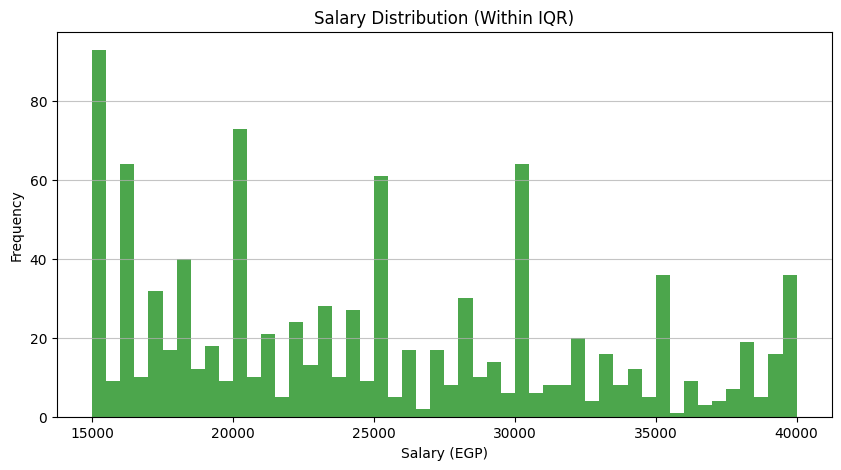

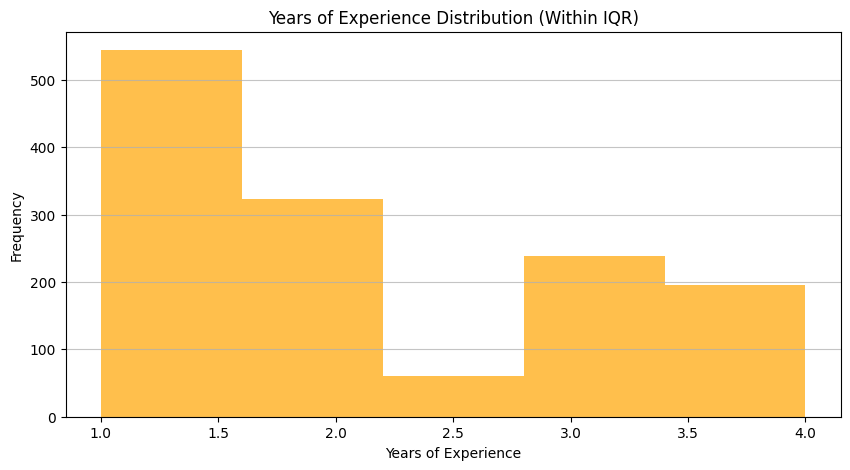

In [49]:
# Filter data within IQR for both Salary and Years of Experience
salary_IQR_df = egp_salary_df[(egp_salary_df['Salary'] >= salary_Q1) & (egp_salary_df['Salary'] <= salary_Q3)]
yoe_IQR_df =  egp_salary_df[(egp_salary_df['YearsOfExperience'] >= yoe_Q1) & (egp_salary_df['YearsOfExperience'] <= yoe_Q3)]

# Visualize Salary and Years of Experience within IQR
plt.figure(figsize=(10,5))
plt.hist(salary_IQR_df['Salary'], bins=50, color='green', alpha=0.7)
plt.title('Salary Distribution (Within IQR)')
plt.xlabel('Salary (EGP)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(yoe_IQR_df['YearsOfExperience'], bins=5, color='orange', alpha=0.7)
plt.title('Years of Experience Distribution (Within IQR)')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.75)
plt.show()

It's clear from the salary distribution that salaries multiples of 5000 are more common all other salaries.

### Correlation between Salary and Years of Experience

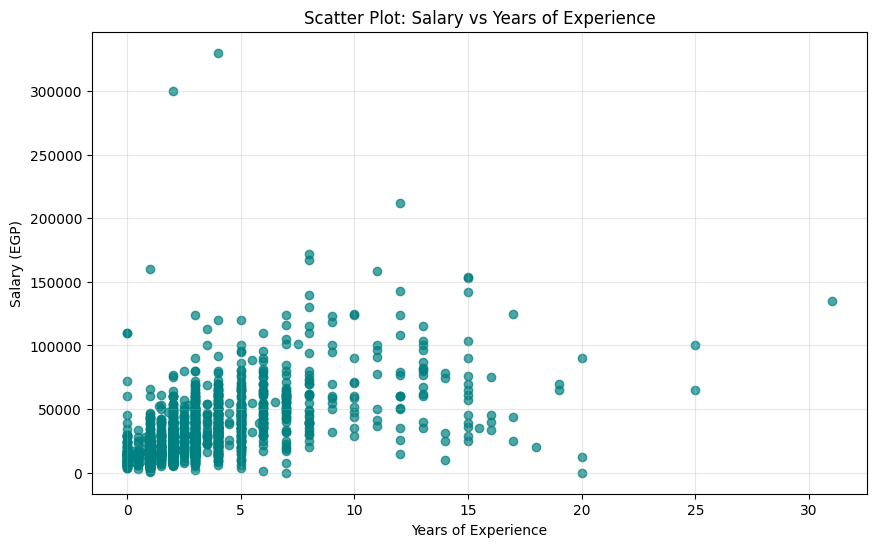

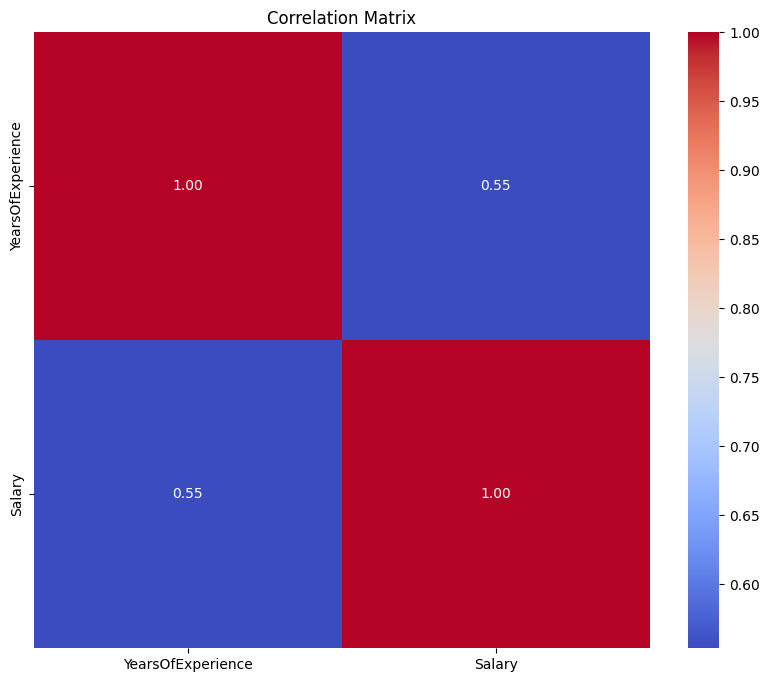

In [50]:
# Scatter plot of Salary vs Years of Experience
plt.figure(figsize=(10,6))
plt.scatter(
    egp_salary_df['YearsOfExperience'],
    egp_salary_df['Salary'],
    alpha=0.7,
    color='teal'
)
plt.title('Scatter Plot: Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation matrix (only numeric columns, Salary and Years of Experience)
plt.figure(figsize=(10,8))
numeric_df = egp_salary_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### Visualization of Salaries by Gender

/tmp/ipykernel_68210/627874496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=egp_salary_df, x='Gender', palette='pastel')


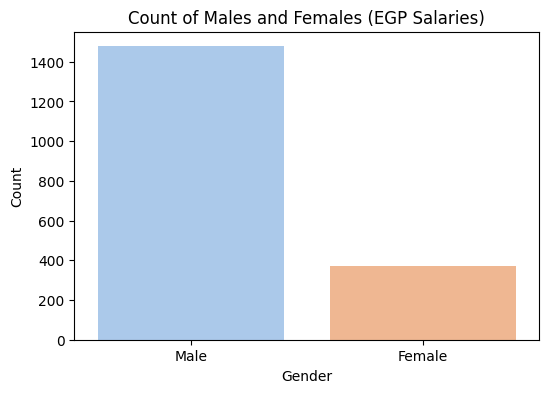

/tmp/ipykernel_68210/627874496.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=egp_salary_df, x='Gender', y='Salary', palette='pastel')


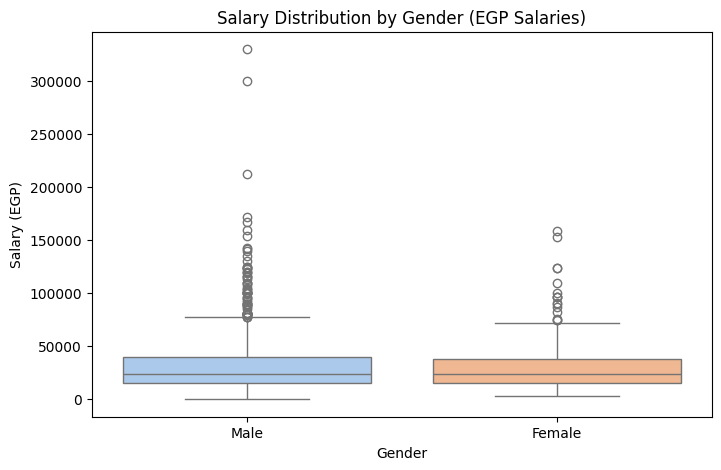

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(data=egp_salary_df, x='Gender', palette='pastel')
plt.title('Count of Males and Females (EGP Salaries)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=egp_salary_df, x='Gender', y='Salary', palette='pastel')
plt.title('Salary Distribution by Gender (EGP Salaries)')
plt.xlabel('Gender')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The ratio between working men and women in software engineering industry is reflected in the first diagram. According to this [report](https://www.statista.com/statistics/1446245/worldwide-developer-gender-distribution/), women represent 20% of the software engineering firm.

### Visualization of Salaries by Level

/tmp/ipykernel_68210/3425243942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=egp_salary_df, x='Level', palette='Set2', order=egp_salary_df['Level'].value_counts().index)


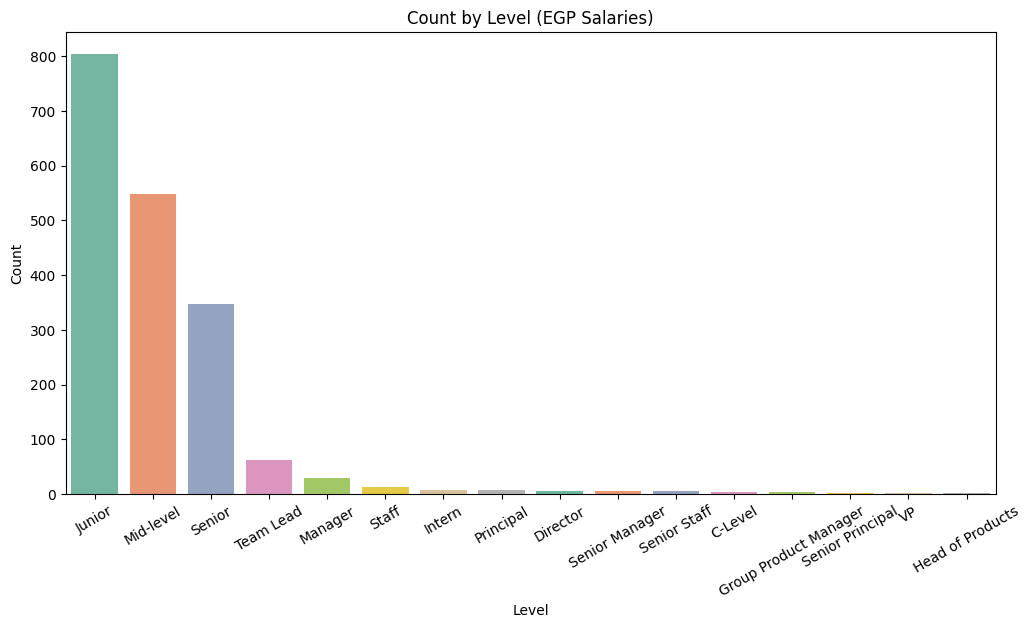

/tmp/ipykernel_68210/3425243942.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=egp_salary_df, x='Level', y='Salary', palette='Set2', order=egp_salary_df['Level'].value_counts().index)


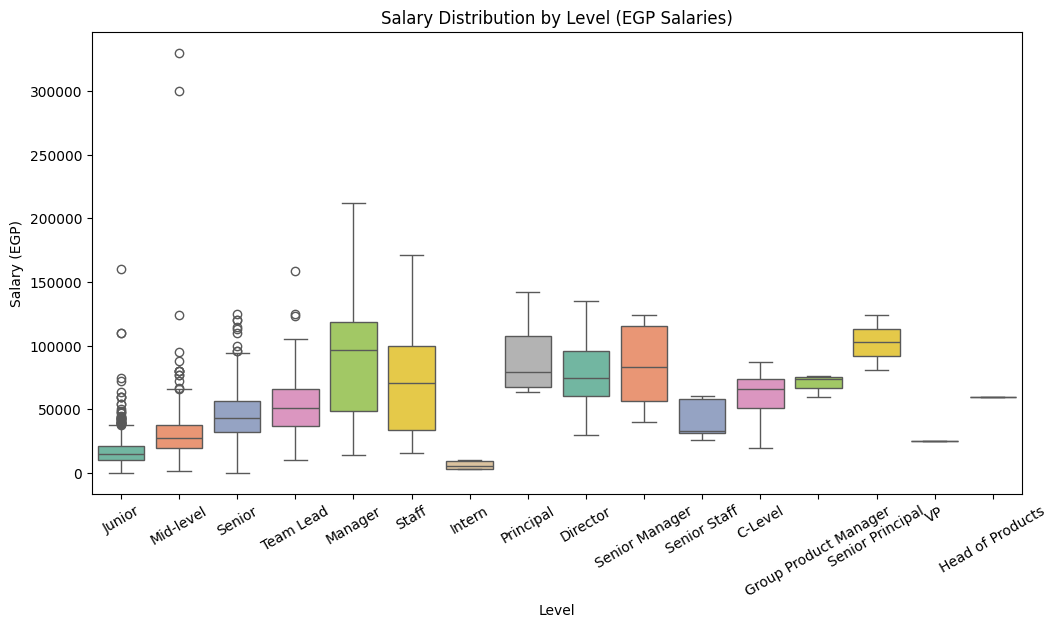

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(data=egp_salary_df, x='Level', palette='Set2', order=egp_salary_df['Level'].value_counts().index)
plt.title('Count by Level (EGP Salaries)')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=egp_salary_df, x='Level', y='Salary', palette='Set2', order=egp_salary_df['Level'].value_counts().index)
plt.title('Salary Distribution by Level (EGP Salaries)')
plt.xlabel('Level')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=30)
plt.show()

### Visualization of the top 10 Job Titles with Highest Average Salaries

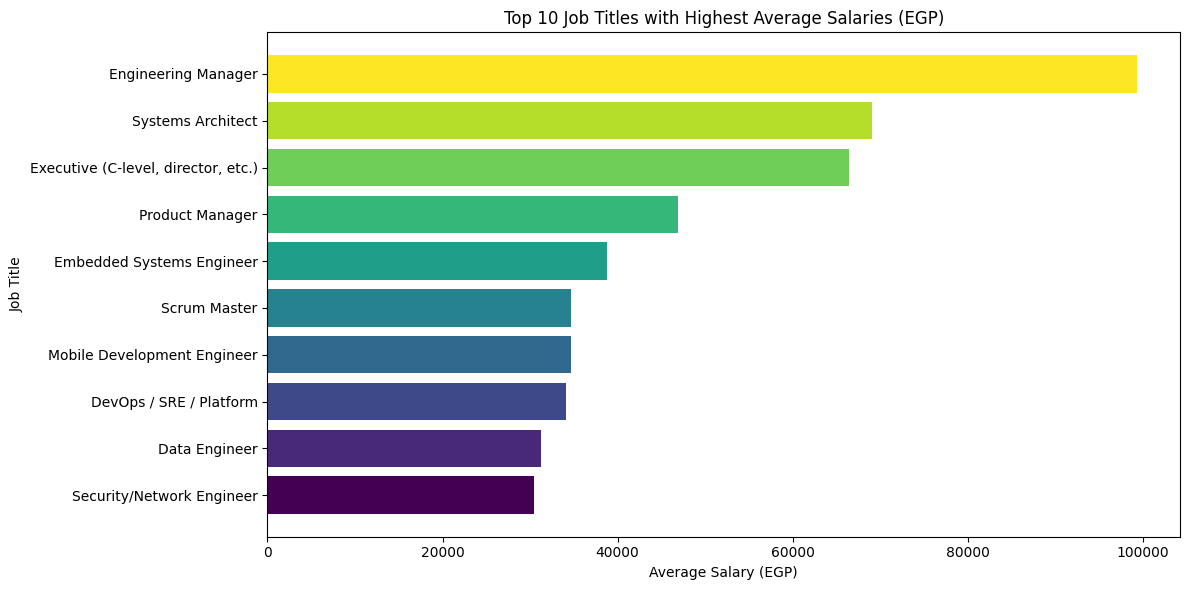

In [53]:
top_10_avg = (
    egp_salary_df.groupby('Title')['Salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
plt.barh(top_10_avg.index[::-1], top_10_avg.values[::-1], color=plt.cm.viridis(np.linspace(0, 1, 10)))
plt.title('Top 10 Job Titles with Highest Average Salaries (EGP)')
plt.xlabel('Average Salary (EGP)')
plt.ylabel('Job Title')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

## Visualization of Programming Languages

In [82]:
df["ProgrammingLanguages"] = df["ProgrammingLanguages"].str.replace(" and ", ", ", regex=False) # remove all ands
df_exploded = df.assign(ProgrammingLanguages=df["ProgrammingLanguages"].str.split(", ")).explode("ProgrammingLanguages") # Explode the languages column to allow one language per row
df_exploded["ProgrammingLanguages"] = df_exploded["ProgrammingLanguages"].str.strip().str.lower() # lowercase all languages and remove leading/trailing spaces
language_partitions = {
    lang: df_exploded[df_exploded["ProgrammingLanguages"] == lang]
    for lang in df_exploded["ProgrammingLanguages"].unique()
}
print(f"{len(language_partitions.keys())} unique programming languages found in the dataset.")

103 unique programming languages found in the dataset.


In [83]:
for key, _ in language_partitions.items():
    print(f"{key}: {language_partitions[key].shape[0]}")

php: 194
javascript: 926
typescript: 676
html/css: 647
nan: 0
python: 641
java: 412
c/c++: 153
r: 17
sql: 44
c#: 381
go: 91
kotlin: 108
matlab: 1
python,: 3
ruby: 62
html/css,: 8
dart: 73
scala: 11
vba: 1
m-code: 1
swift: 72
bash script: 3
powershell: 4
bash: 13
pl/sql: 1
abap: 3
outsystems: 4
rust: 7
power bi & excel & google sheets: 1
no programming: 1
verilog / systemverilog: 1
vb.net,uipath,automationanywhere: 1
php,: 2
flutter: 2
yaml: 1
liquid: 1
not a coding job: 1
javascript,: 2
rescript: 2
shell scripting: 3
elixir: 2
no: 1
x++: 3
non: 1
spss: 1
power bi: 1
c: 1
m: 1
esql: 3
system tools: 1
tcl: 1
julia: 1
vb.net: 2
rpa: 1
lisp: 1
groovy: 2
sas: 3
vb: 2
golang: 1
pl sql: 1
no programing: 1
no programing experience required at my role: 1
appian: 1
hcl: 1
t-sql: 2
perl: 1
shell: 3
labview: 1
the product is a language developed by the company: 1
vlang: 1
low code: 1
apex: 2
system verilog: 1
dax: 2
data engineering stack: 1
node.js: 1
matlab script: 1
sql,: 1
visual scripting: 1


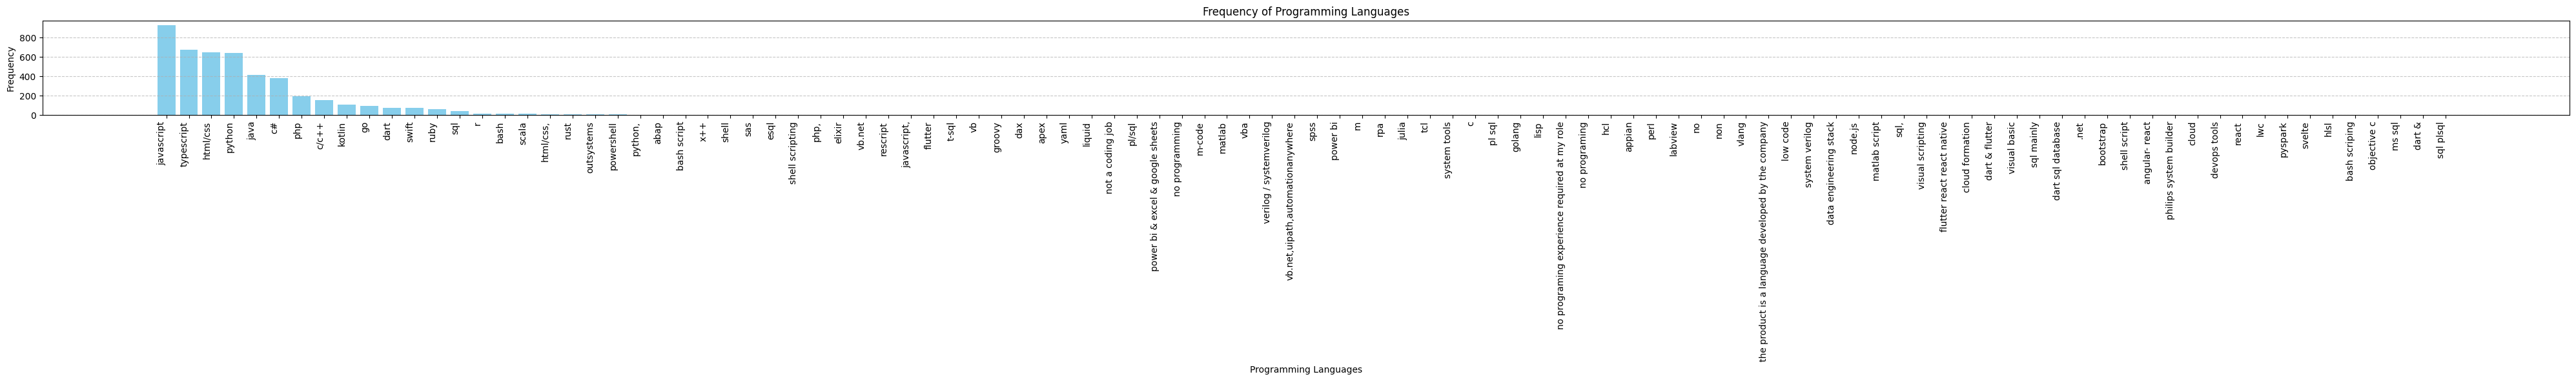

In [ ]:
# Show the frequency of each programming language

# Calculate the frequency of each language
language_counts = df_exploded["ProgrammingLanguages"].value_counts()

# Plotting
plt.figure(figsize=(30, 6))
plt.bar(language_counts.index, language_counts.values, color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.xlabel("Programming Languages")
plt.ylabel("Frequency")
plt.title("Frequency of Programming Languages")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Inferential Analysis**